In [2]:
import os
import numpy as np
from HSI_class import HSI
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
# Load prediction
results_full = []
results_full_path = r"C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_Full\20250619_163749"

results_1024 = []
results_1024_path = r"C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_1024\20250617_142018"

results_512 = []
results_512_path = r"C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253"

results_256 = []
results_256_path = r"C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_256\20250618_144136"

total = 0
for filename in os.listdir(results_full_path):
    file_path = os.path.join(results_full_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        pred_matrix = np.load(file_path)
        results_full.append(pred_matrix)
        total +=1

for filename in os.listdir(results_1024_path):
    file_path = os.path.join(results_1024_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        pred_matrix = np.load(file_path)
        results_1024.append(pred_matrix)
        total +=1

for filename in os.listdir(results_512_path):
    file_path = os.path.join(results_512_path, filename)         
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        pred_matrix = np.load(file_path)
        results_512.append(pred_matrix)
        total +=1

for filename in os.listdir(results_256_path):
    file_path = os.path.join(results_256_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        pred_matrix = np.load(file_path)
        results_256.append(pred_matrix)
        total +=1
   

Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_Full\20250619_163749\results 0 MyMethod.npy
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_Full\20250619_163749\results 1 MyMethod.npy
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_Full\20250619_163749\results 2 MyMethod.npy
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_Full\20250619_163749\results 3 MyMethod.npy
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_Full\20250619_163749\results 4 MyMethod.npy
Processing file: C:\Users\PC\Documents\c

In [7]:
dataset_path = r"C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets"

datasets = []
dataset_used = 1

max = 9
i = 0
for filename in os.listdir(dataset_path):
    if i > max:
        break
    file_path = os.path.join(dataset_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        hsi = HSI(file_path)
        datasets.append(hsi)
    i += 1

Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets\GM01.mat
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets\GM02.mat
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets\GM03.mat
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets\GM04.mat
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets\GM05.mat
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets\GM06.mat
Processing file: C:\Users\PC\Documents\code\TA\tugas-akhir-model-deteksi-tumpahan-minyakl\Hyperspectral oil spill detection datasets\GM07.mat
Proces

40
0
1
2
3
4
5
6
7
8
9


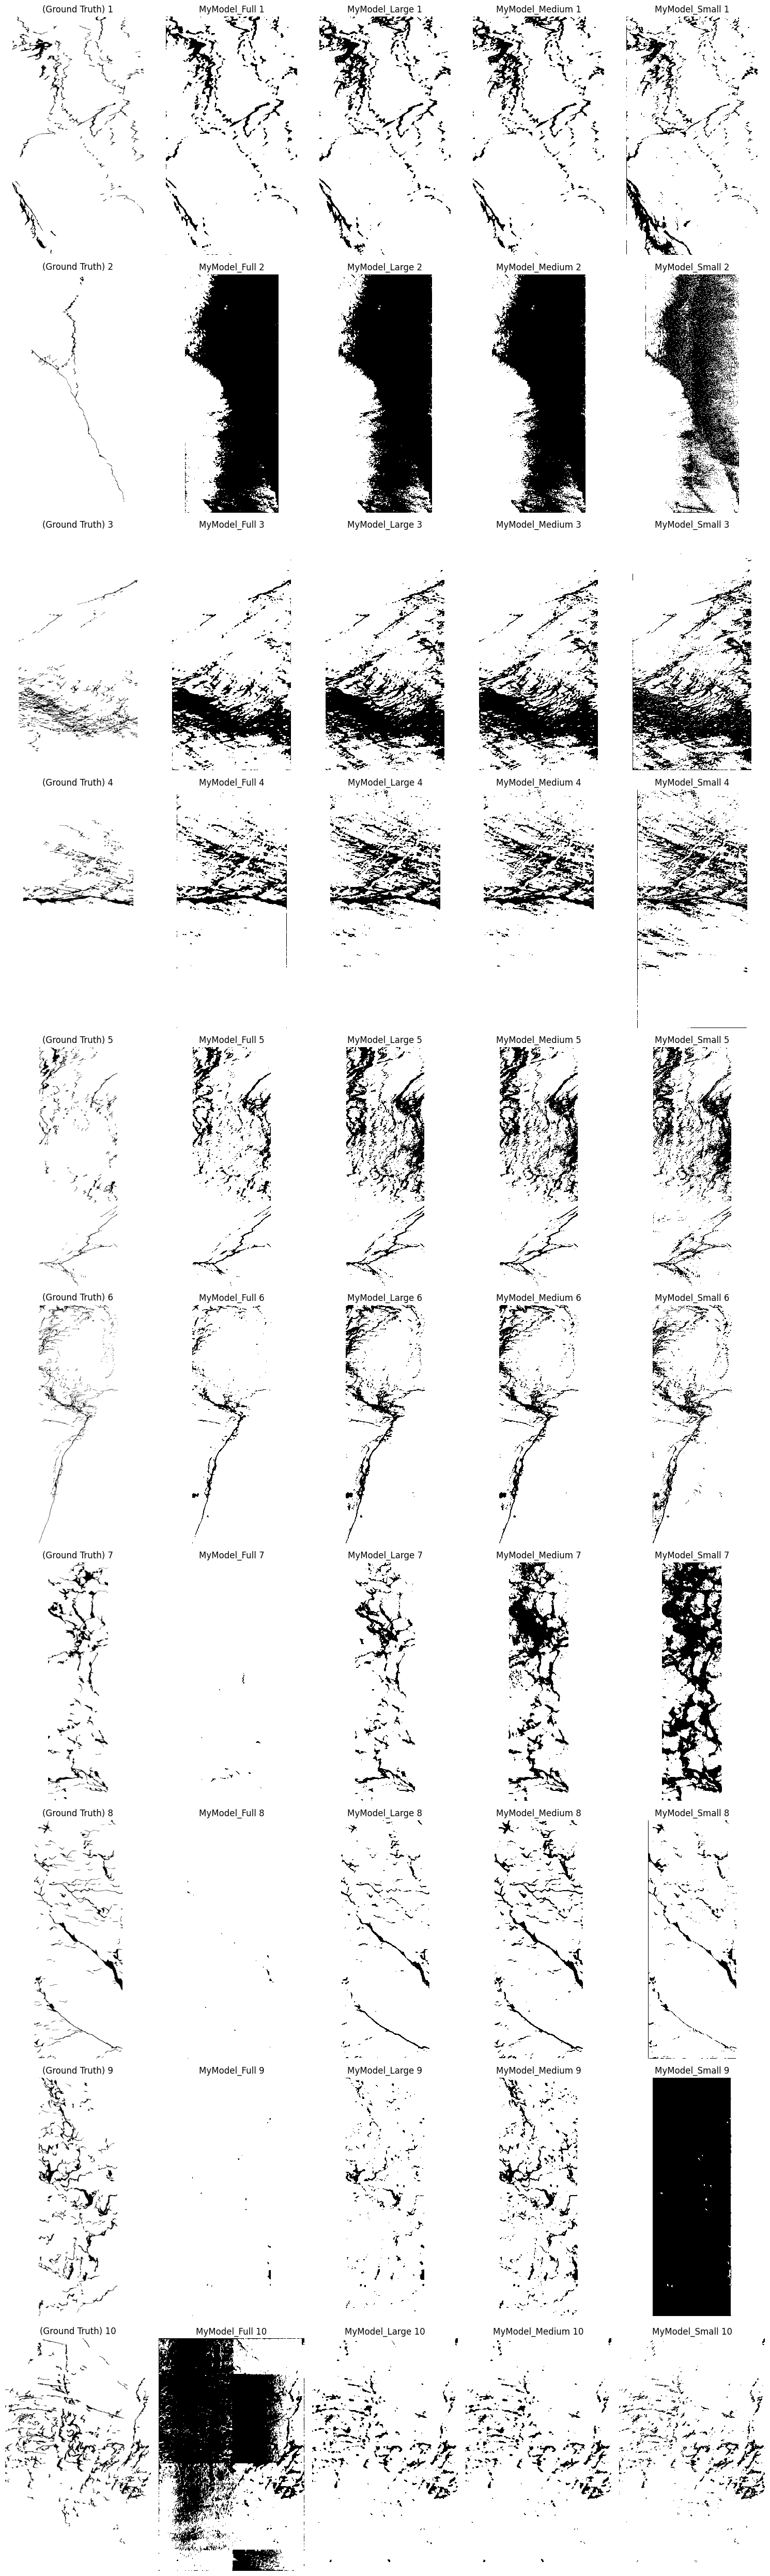

In [26]:
print(total)
# Define custom color map for prediction
custom_cmap = ListedColormap(['white', 'black'])

# Create figure with 2 subplots side by side
fig, axs = plt.subplots(10, 5, figsize=(15, 50))

for i in range(10):
    print(i)
    dataset = datasets[i]
    gt = dataset.gt

    # --- First plot: Ground Truth (Binary Mask) ---
    im1 = axs[i][0].imshow(1 - gt, cmap='gray')
    axs[i][0].set_title(f'(Ground Truth) {i+1}')
    axs[i][0].axis('off')
    # fig.colorbar(im1, ax=axs[i][0], fraction=0.046, pad=0.04)

    # --- Second plot: Predictions ---
    im2 = axs[i][1].imshow(results_full[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][1].set_title(f'MyModel_Full {i+1}')
    axs[i][1].axis('off')
    # fig.colorbar(im2, ax=axs[i][1], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)

    # --- Third plot: Predictions ---
    im2 = axs[i][2].imshow(results_1024[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][2].set_title(f'MyModel_Large {i+1}')
    axs[i][2].axis('off')
    # fig.colorbar(im2, ax=axs[i][2], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)

    # --- Second plot: Predictions ---
    im2 = axs[i][3].imshow(results_512[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][3].set_title(f'MyModel_Medium {i+1}')
    axs[i][3].axis('off')
    # fig.colorbar(im2, ax=axs[i][3], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)

    # --- Second plot: Predictions ---
    im2 = axs[i][4].imshow(results_256[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][4].set_title(f'MyModel_Small {i+1}')
    axs[i][4].axis('off')
    # fig.colorbar(im2, ax=axs[i][4], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)





plt.tight_layout()
plt.show()


40
0
1
2
3
4
5
6
7
8
9


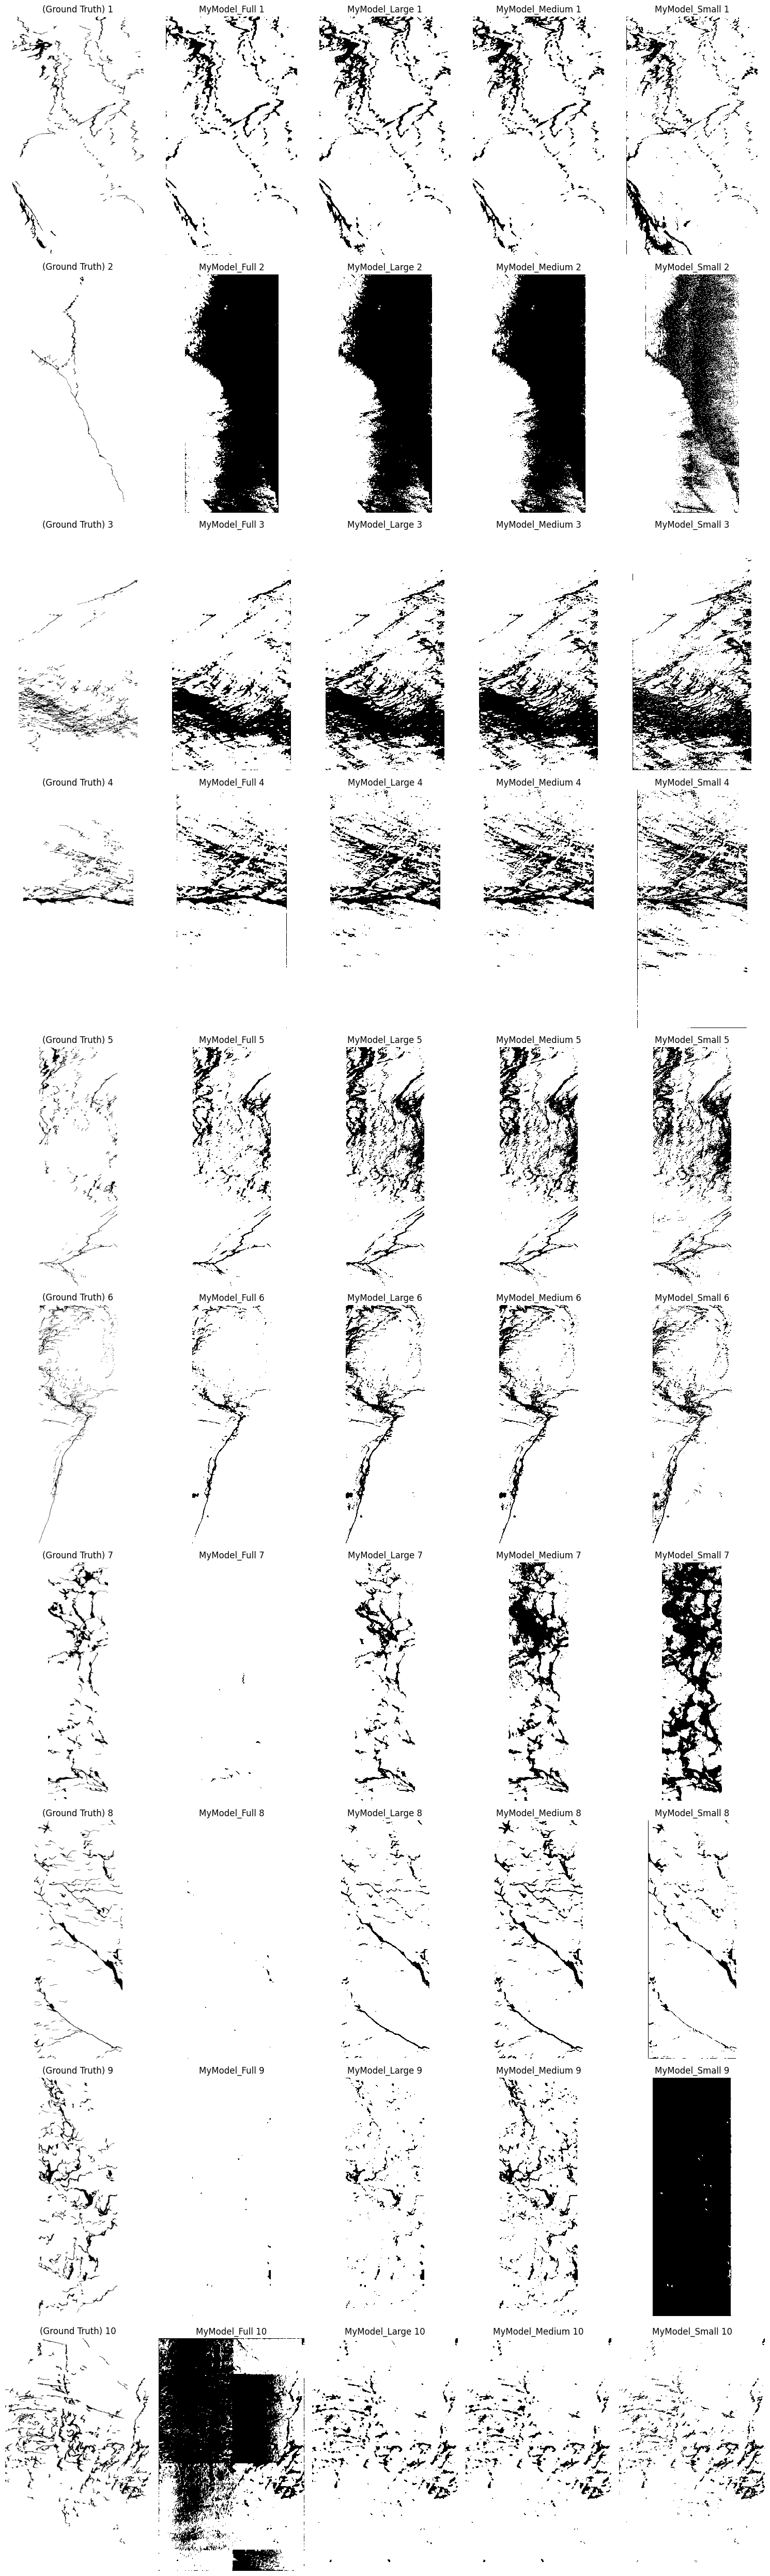

In [ ]:
print(total)
# Define custom color map for prediction
custom_cmap = ListedColormap(['white', 'black'])

# Create figure with 2 subplots side by side
fig, axs = plt.subplots(10, 5, figsize=(15, 50))

for i in range(10):
    print(i)
    dataset = datasets[i]
    gt = dataset.gt

    # --- First plot: Ground Truth (Binary Mask) ---
    im1 = axs[i][0].imshow(1 - gt, cmap='gray')
    axs[i][0].set_title(f'(Ground Truth) {i+1}')
    axs[i][0].axis('off')
    # fig.colorbar(im1, ax=axs[i][0], fraction=0.046, pad=0.04)

    # --- Second plot: Predictions ---
    im2 = axs[i][1].imshow(results_full[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][1].set_title(f'MyModel_Full {i+1}')
    axs[i][1].axis('off')
    # fig.colorbar(im2, ax=axs[i][1], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)

    # --- Third plot: Predictions ---
    im2 = axs[i][2].imshow(results_1024[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][2].set_title(f'MyModel_Large {i+1}')
    axs[i][2].axis('off')
    # fig.colorbar(im2, ax=axs[i][2], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)

    # --- Second plot: Predictions ---
    im2 = axs[i][3].imshow(results_512[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][3].set_title(f'MyModel_Medium {i+1}')
    axs[i][3].axis('off')
    # fig.colorbar(im2, ax=axs[i][3], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)

    # --- Second plot: Predictions ---
    im2 = axs[i][4].imshow(results_256[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][4].set_title(f'MyModel_Small {i+1}')
    axs[i][4].axis('off')
    # fig.colorbar(im2, ax=axs[i][4], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)





plt.tight_layout()
plt.show()
